In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [27]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# query url
query_url = base_url + "&appid=" + weather_api_key + "&q="

#Create Empty Lists 
city_name = []
country = []
date = []
lat = []
lng = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

# Loop through the cities and perform API Calls
for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
                
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f'Retrieving Record Number {record} : {city}')
        record = record + 1
   
    except KeyError:
        print(f'City not found. Skipping...')
        
        

Beginning Data Retrieval
-----------------------------
Retrieving Record Number 1 : luocheng
Retrieving Record Number 2 : khatanga
Retrieving Record Number 3 : hilo
Retrieving Record Number 4 : jamestown
Retrieving Record Number 5 : lata
Retrieving Record Number 6 : kidal
Retrieving Record Number 7 : chengde
Retrieving Record Number 8 : havoysund
Retrieving Record Number 9 : te anau
Retrieving Record Number 10 : qaanaaq
Retrieving Record Number 11 : esperance
Retrieving Record Number 12 : rawson
Retrieving Record Number 13 : hukuntsi
Retrieving Record Number 14 : atuona
City not found. Skipping...
Retrieving Record Number 15 : parkes
Retrieving Record Number 16 : vaini
Retrieving Record Number 17 : cabo san lucas
Retrieving Record Number 18 : muzambinho
Retrieving Record Number 19 : busselton
Retrieving Record Number 20 : natal
Retrieving Record Number 21 : hermanus
Retrieving Record Number 22 : puerto ayora
Retrieving Record Number 23 : victoria
City not found. Skipping...
Retrieving 

Retrieving Record Number 197 : ribeira grande
Retrieving Record Number 198 : bayji
Retrieving Record Number 199 : nhulunbuy
Retrieving Record Number 200 : ucluelet
Retrieving Record Number 201 : cordoba
Retrieving Record Number 202 : achinsk
Retrieving Record Number 203 : isla vista
Retrieving Record Number 204 : mendi
City not found. Skipping...
Retrieving Record Number 205 : mitsamiouli
Retrieving Record Number 206 : guatire
Retrieving Record Number 207 : kamaishi
Retrieving Record Number 208 : pacific grove
Retrieving Record Number 209 : berlevag
Retrieving Record Number 210 : gorontalo
Retrieving Record Number 211 : shenjiamen
Retrieving Record Number 212 : qujing
Retrieving Record Number 213 : tasiilaq
City not found. Skipping...
Retrieving Record Number 214 : tomarovka
City not found. Skipping...
Retrieving Record Number 215 : makinsk
Retrieving Record Number 216 : auki
Retrieving Record Number 217 : raudeberg
Retrieving Record Number 218 : elizabeth city
Retrieving Record Number

Retrieving Record Number 390 : kalulushi
Retrieving Record Number 391 : leningradskiy
Retrieving Record Number 392 : sinjar
Retrieving Record Number 393 : port augusta
Retrieving Record Number 394 : yamada
Retrieving Record Number 395 : rochegda
Retrieving Record Number 396 : tuxpan
Retrieving Record Number 397 : sakakah
Retrieving Record Number 398 : adet
Retrieving Record Number 399 : rocha
Retrieving Record Number 400 : lokosovo
Retrieving Record Number 401 : vero beach
Retrieving Record Number 402 : troitsko-pechorsk
Retrieving Record Number 403 : santa rosa
Retrieving Record Number 404 : englewood
Retrieving Record Number 405 : abu samrah
Retrieving Record Number 406 : pevek
City not found. Skipping...
City not found. Skipping...
Retrieving Record Number 407 : kitami
Retrieving Record Number 408 : loanda
Retrieving Record Number 409 : kisaran
Retrieving Record Number 410 : mumford
Retrieving Record Number 411 : namatanai
Retrieving Record Number 412 : kamina
Retrieving Record Numb

In [4]:
#Convert Raw Data to DataFrame
#Export the city data into a .csv.
city_data = pd.DataFrame({"City": city_name,
                          "Country": country,
                          "Date": date,
                          "Lat": lat,
                         "Lng": lng,
                         "Cloudiness": cloudiness, 
                         "Humidity": humidity,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})

city_data.to_csv("city_data.csv")
city_data.count()


City          571
Country       571
Date          571
Lat           571
Lng           571
Cloudiness    571
Humidity      571
Max Temp      571
Wind Speed    571
dtype: int64

In [23]:
#Display dataframe
city_data.head(15)


,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Luocheng,CN,1593383918,29.38,104.03,77,89,73.98,0.65
1,Khatanga,RU,1593383522,71.97,102.50,3,31,83.12,17.13
2,Hilo,US,1593383625,19.73,-155.09,90,65,80.60,10.29
3,Jamestown,US,1593383578,42.10,-79.24,40,64,75.99,12.75
4,Lata,PT,1593383918,40.16,-8.33,10,85,68.00,3.33
5,Kidal,ML,1593383918,18.44,1.41,0,12,92.93,10.69
6,Chengde,CN,1593383919,40.97,117.94,100,69,69.73,1.30
7,Havøysund,NO,1593383685,71.00,24.66,75,87,42.80,16.11
8,Te Anau,NZ,1593383648,-45.42,167.72,98,86,41.74,1.70
9,Qaanaaq,GL,1593383523,77.48,-69.36,0,62,43.57,1.39


In [59]:
#Inspect the data and remove the cities where the humidity > 100%.
humidity_df = city_data.loc[(city_data['Humidity'] > 100)]
humidity_df

# there are no cities that have humidity > 100%


,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed


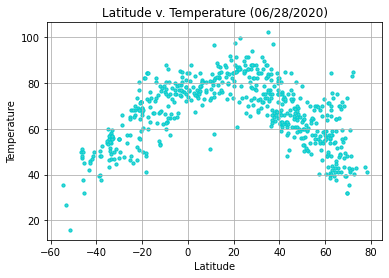

<Figure size 432x288 with 0 Axes>

In [31]:
#Latitude vs. Temperature Plot
plt.scatter(lat, max_temp, marker="o", facecolors="mediumturquoise", edgecolors="darkturquoise", alpha = 1,s=10)
plt.title("Latitude v. Temperature (06/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show()
plt.savefig("Latitude v. Temperature.png")

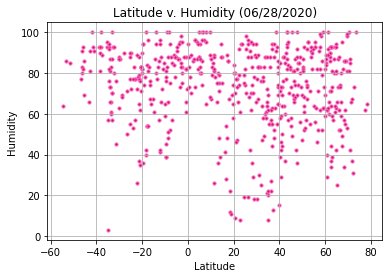

In [22]:
#Latitude vs. Humidity Plot
plt.scatter(lat, humidity, marker="o", facecolors="mediumvioletred", edgecolors="hotpink", alpha = 1,s=10)
plt.title("Latitude v. Humidity (06/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()
plt.savefig("Latitude v. Humidity.png")

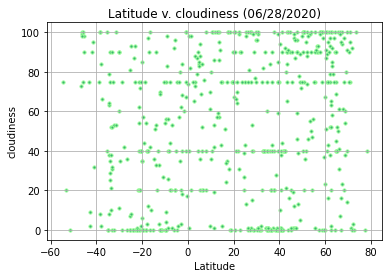

<Figure size 432x288 with 0 Axes>

In [25]:
#Latitude vs. Cloudiness Plot
plt.scatter(lat, cloudiness, marker="o", facecolors="mediumseagreen", edgecolors="palegreen", alpha = 1,s=10)
plt.title("Latitude v. cloudiness (06/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.grid()
plt.show()
plt.savefig("Latitude v. Cloudiness.png")

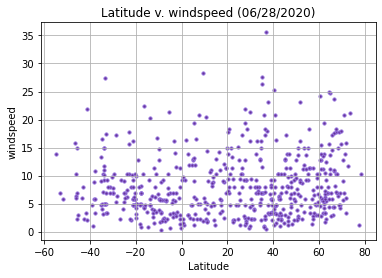

<Figure size 432x288 with 0 Axes>

In [29]:
#Latitude vs. Wind Speed Plot
plt.scatter(lat, wind_speed, marker="o", facecolors="rebeccapurple", edgecolors="mediumpurple", alpha = 1,s=10)
plt.title("Latitude v. windspeed (06/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("windspeed")
plt.grid()
plt.show()
plt.savefig("Latitude v. windspeed.png")

In [46]:
#Linear Regression
northern_hemisphere=city_data[city_data['Lat']>0]
southern_hemisphere=city_data[city_data['Lat']<0]

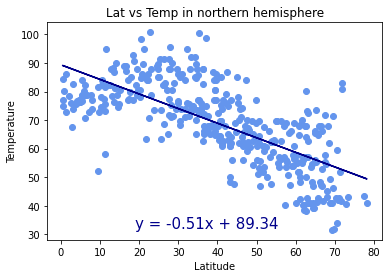

rvalue = -0.709
r-squared = 0.503


In [47]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter and regression line
plt.scatter(x_values,y_values, color= "cornflowerblue")

plt.plot(x_values,regress_values,"darkblue")

plt.annotate(line_eq,(19,32),fontsize=15,color="darkblue")

# labels
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Lat vs Temp in northern hemisphere')
plt.show()

# r values 
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

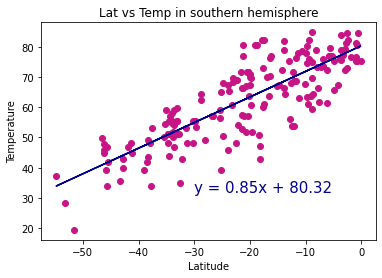

rvalue = 0.823
r-squared = 0.677


In [56]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter and regression line
plt.scatter(x_values,y_values, color= "mediumvioletred")

plt.plot(x_values,regress_values,"darkblue")

plt.annotate(line_eq,(-30,32),fontsize=15,color="darkblue")

# labels
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Lat vs Temp in southern hemisphere')
plt.show()

# r values 
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

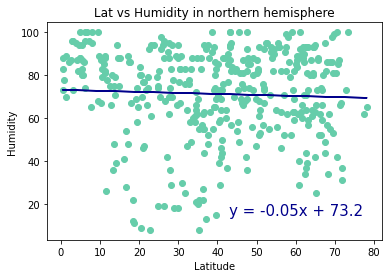

rvalue = -0.045
r-squared = 0.002


In [55]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter and regression line
plt.scatter(x_values,y_values, color= "mediumaquamarine")

plt.plot(x_values,regress_values,"darkblue")

plt.annotate(line_eq,(43,15),fontsize=15,color="darkblue")

# labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Lat vs Humidity in northern hemisphere')
plt.show()

# r values 
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

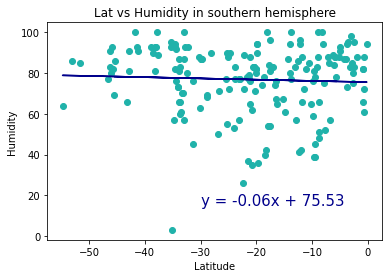

rvalue = -0.048
r-squared = 0.002


In [63]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter and regression line
plt.scatter(x_values,y_values, color= "lightseagreen")

plt.plot(x_values,regress_values,"darkblue")

plt.annotate(line_eq,(-30,15),fontsize=15,color="darkblue")

# labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Lat vs Humidity in southern hemisphere')
plt.show()

# r values 
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

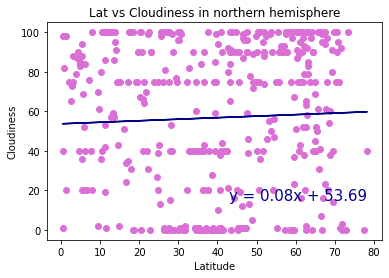

rvalue = 0.042
r-squared = 0.002


In [65]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter and regression line
plt.scatter(x_values,y_values, color= "orchid")

plt.plot(x_values,regress_values,"darkblue")

plt.annotate(line_eq,(43,15),fontsize=15,color="darkblue")

# labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Lat vs Cloudiness in northern hemisphere')
plt.show()

# r values 
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

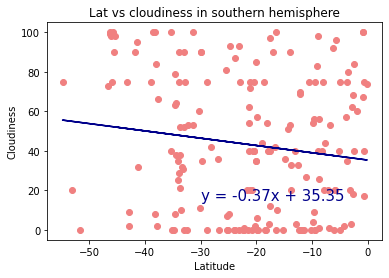

rvalue = -0.142
r-squared = 0.02


In [67]:
 #Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter and regression line
plt.scatter(x_values,y_values, color= "lightcoral")

plt.plot(x_values,regress_values,"darkblue")

plt.annotate(line_eq,(-30,15),fontsize=15,color="darkblue")

# labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Lat vs cloudiness in southern hemisphere')
plt.show()

# r values 
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

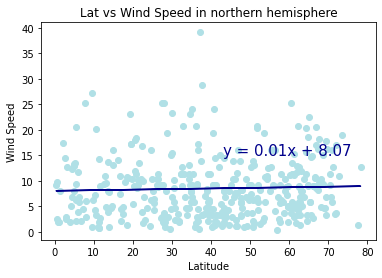

rvalue = 0.038
r-squared = 0.001


In [69]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter and regression line
plt.scatter(x_values,y_values, color= "powderblue")

plt.plot(x_values,regress_values,"darkblue")

plt.annotate(line_eq,(43,15),fontsize=15,color="darkblue")

# labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Lat vs Wind Speed in northern hemisphere')
plt.show()

# r values 
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

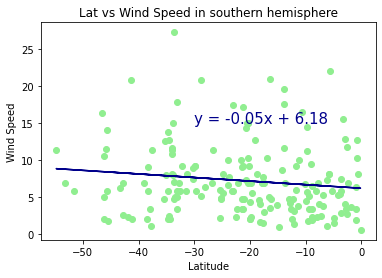

rvalue = -0.133
r-squared = 0.018


In [71]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter and regression line
plt.scatter(x_values,y_values, color= "lightgreen")

plt.plot(x_values,regress_values,"darkblue")

plt.annotate(line_eq,(-30,15),fontsize=15,color="darkblue")

# labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Lat vs Wind Speed in southern hemisphere')
plt.show()

# r values 
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")